<img src="cyberlabs..jpg" style="width:300px;height:300px"/>

<img src="ml_logo.png" style="width:300px;height:300px"/>

<img src="woc_logo-fullsize.png" style="width:200px;height:200px"/>

#  ML Essentials

# Exploratory Data Analysis (EDA)

*  Importing  libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

* Loading the data set

In [2]:
data=pd.read_csv('kmeans_dataset.csv')     #defining a variable named as data for loaded dataset

 * Basic data exploration

In [3]:
data.head                           #by deafault head function will give the 5 records each from top and bottom of dataset

<bound method NDFrame.head of       Hardwork     Skills   Label
0     1.483358   6.135020  C Tier
1    52.864104  48.897037  B Tier
2    67.556683  19.359183  D Tier
3    52.797684  43.650076  B Tier
4    45.060080  74.978268  B Tier
..         ...        ...     ...
455  48.414533  53.807818  B Tier
456  49.534222  54.425778  B Tier
457  30.457458  40.396009  B Tier
458   2.277720   5.085407  C Tier
459  37.012233  51.093717  B Tier

[460 rows x 3 columns]>

In [4]:
data.shape                                 #shape function gives the number of rows and columns present in dataset

(460, 3)

In [5]:
data.info()                                #info function gives breif information about loaded dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hardwork  460 non-null    float64
 1   Skills    460 non-null    float64
 2   Label     460 non-null    object 
dtypes: float64(2), object(1)
memory usage: 10.9+ KB


In [6]:
data.isnull().sum()                        #veifying if data contains any missing values

Hardwork    0
Skills      0
Label       0
dtype: int64

In [7]:
data.describe()  #describe function shows different aspects of data such as minimum,maximum,mean and different percentile values

,Hardwork,Skills
count,460.000000,460.000000
mean,47.019178,38.439590
std,24.895360,26.136017
min,0.712341,1.447058
25%,25.287181,13.987334
50%,48.519039,38.515372
75%,67.467031,60.161463
max,97.618528,95.704652


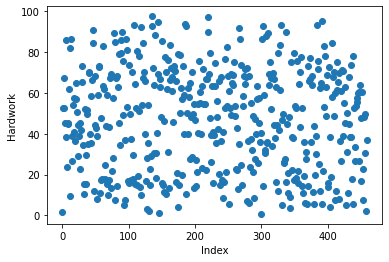

In [8]:
plt.scatter(data.index,data['Hardwork'])     #plotting scatter-plot representing Hardwork against index or observation No.
plt.xlabel('Index')
plt.ylabel("Hardwork")
plt.show()

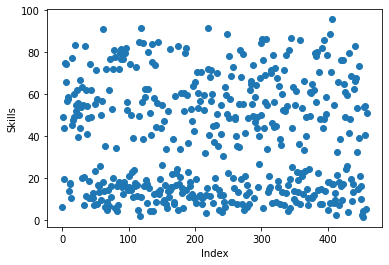

In [9]:
plt.scatter(data.index,data['Skills'])          #plotting scatter-plot representing Skills against index or observation No.
plt.xlabel('Index')
plt.ylabel("Skills")
plt.show()

Text(0, 0.5, 'Frequency')

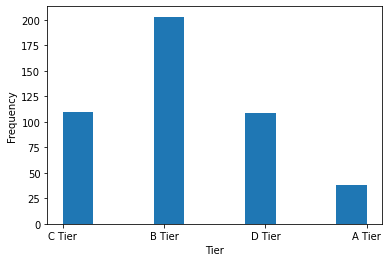

In [10]:
plt.hist(data['Label'])                           #plotting histogram for tier against its frequency
plt.xlabel('Tier')
plt.ylabel("Frequency")

* Handling Outliers       (outliers are observations which are very far from other data)


<AxesSubplot:>

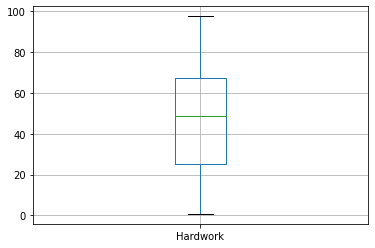

In [11]:
data.boxplot("Hardwork")      #verifying if data contains outliers by plotting boxplot (conclusion:NO outliers is present)

<AxesSubplot:>

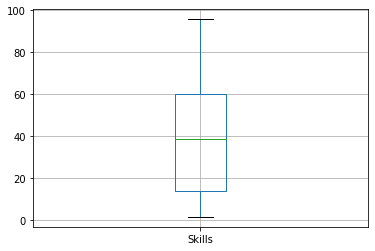

In [12]:
data.boxplot("Skills")                   #(conclusion: NO outliers are present)

 * Univariate Analysis

In [13]:
data_A=data.loc[data['Label']=='A Tier']              #defining variables particularly for observations belonging to each Tier 
data_B=data.loc[data['Label']=='B Tier']              #   using .loc function
data_C=data.loc[data['Label']=='C Tier']
data_D=data.loc[data['Label']=='D Tier']

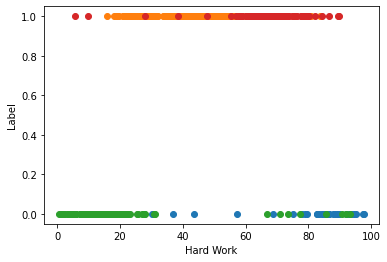

In [14]:
plt.scatter(data_A['Hardwork'],np.zeros_like(data_A['Hardwork']),label='Tier A')
plt.scatter(data_B['Hardwork'], np.ones_like(data_B['Hardwork']),label='Tier B')   #Color    Tier
plt.scatter(data_C['Hardwork'],np.zeros_like(data_C['Hardwork']),label='Tier C')   #Blue      A
plt.scatter(data_D['Hardwork'], np.ones_like(data_D['Hardwork']),label='Tier D')   #Orange    B
plt.xlabel('Hard Work')                                                            #Green     C
plt.ylabel('Label')                                                                #Red       D
plt.show()                                                                  #Plotting Scatterplot univariate(Hardwork) Analysis

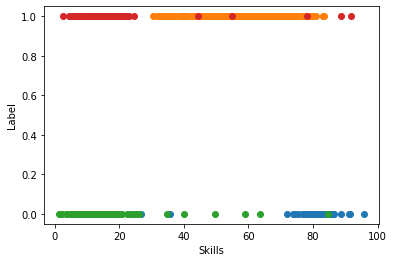

In [15]:
plt.scatter(data_A['Skills'],np.zeros_like(data_A['Skills']),label='Tier A')#Plotting Scatterplot univariate(Skills) Analysis
plt.scatter(data_B['Skills'], np.ones_like(data_B['Skills']),label='Tier B')           
plt.scatter(data_C['Skills'],np.zeros_like(data_C['Skills']),label='Tier C')           
plt.scatter(data_D['Skills'], np.ones_like(data_D['Skills']),label='Tier D')          
plt.xlabel('Skills')                                                      
plt.ylabel('Label')                                                     
plt.show()      

* Bivariate Analysis

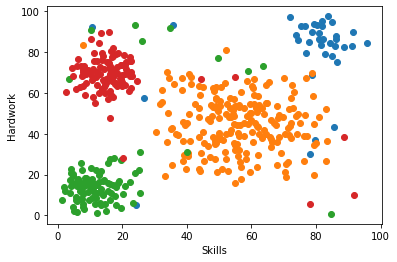

In [16]:
plt.scatter(data_A['Skills'],data_A['Hardwork'],label='Tier A')    #plotting scatter-plot representing Hardwork against Skills
plt.scatter(data_B['Skills'],data_B['Hardwork'],label='Tier B')
plt.scatter(data_C['Skills'],data_C['Hardwork'],label='Tier C')
plt.scatter(data_D['Skills'],data_D['Hardwork'],label='Tier D')
plt.xlabel('Skills')
plt.ylabel('Hardwork')
plt.show()

<img src="hardwork.jpg" style="width:200px;height:200px"/>

# K-Means Clustering

* Train Test Split

In [17]:
from sklearn.model_selection import train_test_split #splitting the dataset using sklearn,(60:20:20) as training,validation,test

data, data_test = train_test_split(data,test_size=0.2,train_size=0.8)
data_train, data_valid = train_test_split(data,test_size = 0.25,train_size =0.75)

In [21]:
data_train.head

<bound method NDFrame.head of       Hardwork     Skills   Label
318  69.778129  78.891517  B Tier
15   26.432058  45.246822  B Tier
289   8.479659  10.615885  C Tier
165  61.113668  22.089605  D Tier
418   8.061725   7.110615  C Tier
..         ...        ...     ...
376  64.004669  64.610900  B Tier
181  19.783604  12.709893  C Tier
416  65.243402  65.551738  B Tier
97   80.896978  52.258623  B Tier
194  48.260295  52.986704  B Tier

[276 rows x 3 columns]>

In [22]:
data_test.head

<bound method NDFrame.head of       Hardwork     Skills   Label
329  83.634125   7.779801  B Tier
12   82.277096  17.079684  D Tier
384  93.196675  80.194067  A Tier
133  22.586215  50.960454  B Tier
192  65.109352  17.936983  D Tier
..         ...        ...     ...
182  73.144729   5.863843  D Tier
262  22.581918  39.824105  B Tier
140  88.566226  73.762379  A Tier
50   68.417158  23.110767  D Tier
298  36.014758  67.870571  B Tier

[92 rows x 3 columns]>

In [23]:
data_valid.head

<bound method NDFrame.head of       Hardwork     Skills   Label
282   5.920891  13.204539  C Tier
213  54.388575  59.693908  B Tier
235  42.188819  35.209638  B Tier
105  70.365734  22.735474  D Tier
3    52.797684  43.650076  B Tier
..         ...        ...     ...
378  11.647646  11.192476  C Tier
30   65.547598  19.832964  D Tier
75   21.957008  52.768351  B Tier
102  49.521172  74.407246  B Tier
172  16.438624  22.281333  C Tier

[92 rows x 3 columns]>

* Applying algorithm 

In [31]:
from sklearn.cluster import KMeans
%matplotlib inline

In [32]:
sse = []                                                      #validation by sum of squared error method
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(data_valid[['Skills','Hardwork']])
    sse.append(km.inertia_)

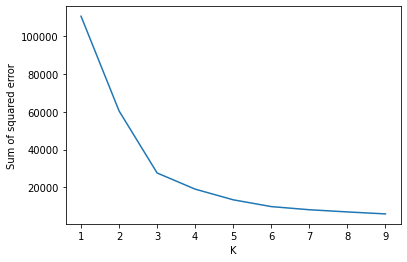

In [33]:
plt.xlabel('K')                                               #Plotting elbow plot for depicting the numbers of clusters
plt.ylabel('Sum of squared error')                            #conclusion - number of clusters should be 4
plt.plot(range(1,10),sse)

In [34]:
km = KMeans(n_clusters=4)                                                 #declaring the number of clusters

In [35]:
km.fit(data_train[['Skills','Hardwork']],data_train['Label'])             #fitting  the data or training our model

KMeans(n_clusters=4)

In [36]:
km.cluster_centers_                                                    #shows the cartesian coordinates of centeroid of clusters

array([[17.57983118, 69.43623915],
       [57.90452055, 42.14308993],
       [11.18673039, 13.83415802],
       [74.72466624, 80.14984453]])

* Testing

In [37]:
data_predict=km.predict(data_test[['Skills','Hardwork']])                  #predicting labels for testing dataset

In [38]:
data_predict.shape

(92,)

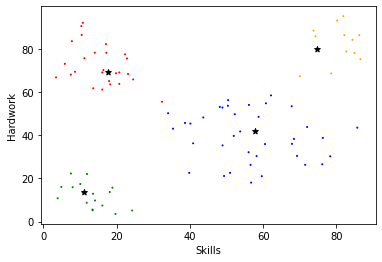

In [39]:
plt.scatter(data_test['Skills'],data_test['Hardwork'],data_predict==0,color='red')    #plotting scatterplot for testing dataset
plt.scatter(data_test['Skills'],data_test['Hardwork'],data_predict==1,color='blue')
plt.scatter(data_test['Skills'],data_test['Hardwork'],data_predict==2,color='green')
plt.scatter(data_test['Skills'],data_test['Hardwork'],data_predict==3,color='orange')
plt.xlabel('Skills')
plt.ylabel('Hardwork')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')
plt.show()

# THE END 